In [1]:
import pandas as pd
import numpy as np
calisan_verileri = pd.read_csv("BalajiFastFoodSales.csv")  # kodlar Pandas içerisine alınıyor.
calisan_verileri.tail() 

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon
999,1000,5/29/2022,Aalopuri,Fastfood,20,3,60,Online,Mrs.,Midnight


In [2]:
calisan_verileri.isnull().sum() 

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

<Axes: >

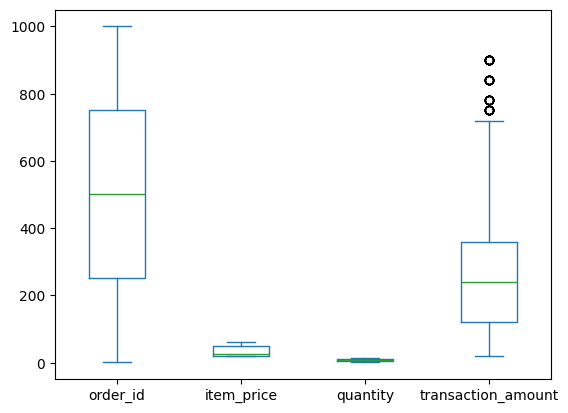

In [3]:
calisan_verileri.plot.box() 

In [4]:
other_NoN = calisan_verileri.fillna(value='Other') #eksik verileri -1 ile doldur

In [5]:
other_NoN.notnull().sum()  # kaç değer girilmiş bilgisi

order_id              1000
date                  1000
item_name             1000
item_type             1000
item_price            1000
quantity              1000
transaction_amount    1000
transaction_type      1000
received_by           1000
time_of_sale          1000
dtype: int64

In [6]:
other_NoN.head(7)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Other,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening


In [21]:
other_NoN.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [22]:
yas_dolu_veri_seti = other_NoN.transaction_amount.fillna(value =other_NoN.transaction_amount.mean())  # yaş değerlerini ortalama ile doldur.

In [23]:
yas_dolu_veri_seti.describe()  # yaş verilerinin istatistiksel değerlerini gözden geçir.

count    1000.000000
mean      275.230000
std       204.402979
min        20.000000
25%       120.000000
50%       240.000000
75%       360.000000
max       900.000000
Name: transaction_amount, dtype: float64

In [24]:
yas_dolu_veri_seti  # yalnızca yaş sütununu almıştır.;

0      260
1      300
2       20
3      150
4      200
      ... 
995    500
996    420
997    780
998    100
999     60
Name: transaction_amount, Length: 1000, dtype: int64

<Axes: >

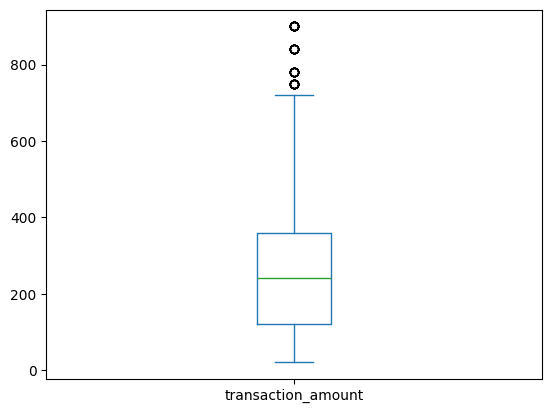

In [25]:
yas_dolu_veri_seti.plot.box()    

In [26]:
Q1 = yas_dolu_veri_seti.quantile (0.25)
Q3 = yas_dolu_veri_seti.quantile (0.75)
IQR = Q3 - Q1
print ("Q1: {}, Q3: {}, IQR = {}".format(Q1,Q3,IQR))

Q1: 120.0, Q3: 360.0, IQR = 240.0


In [27]:
alt_sinir = Q1 - (IQR*1.5)    #istatistiksel tanımlamalar
ust_sinir = Q3 + (IQR*1.5)
print (alt_sinir)
print (ust_sinir)

-240.0
720.0


In [28]:
yas_dolu_veri_seti[yas_dolu_veri_seti > ust_sinir]  # üst sınırdan büyük olan değerler

47     840
50     750
95     900
137    900
144    840
147    780
197    750
269    780
307    780
318    750
326    750
360    900
375    750
387    840
395    750
444    840
476    900
491    900
509    840
543    900
544    780
571    900
585    900
590    780
614    840
624    900
639    900
649    780
682    750
709    900
747    840
764    780
767    840
778    780
785    840
825    900
866    750
893    900
904    750
905    900
912    750
913    840
925    750
997    780
Name: transaction_amount, dtype: int64

In [29]:
yas_dolu_veri_seti[yas_dolu_veri_seti < alt_sinir]  # alt sınırdan küçük olan değerler

Series([], Name: transaction_amount, dtype: int64)

In [30]:
yas_dolu_veri_seti[yas_dolu_veri_seti < alt_sinir].count() # alt sınırdan küçük olan değerlerlerin toplam sayısı

0

In [31]:
yas_dolu_veri_seti[yas_dolu_veri_seti > ust_sinir].count() # ust sınırdan büyük olan değerlerin toplam sayısı

44

In [32]:
yas_dolu_veri_seti[yas_dolu_veri_seti > ust_sinir]  = ust_sinir   #  ust sınır ustundekiler ust sınıra
yas_dolu_veri_seti[yas_dolu_veri_seti < alt_sinir]  = alt_sinir   #

In [33]:
yas_dolu_veri_seti.describe() 

count    1000.000000
mean      270.640000
std       192.436671
min        20.000000
25%       120.000000
50%       240.000000
75%       360.000000
max       720.000000
Name: transaction_amount, dtype: float64

<Axes: >

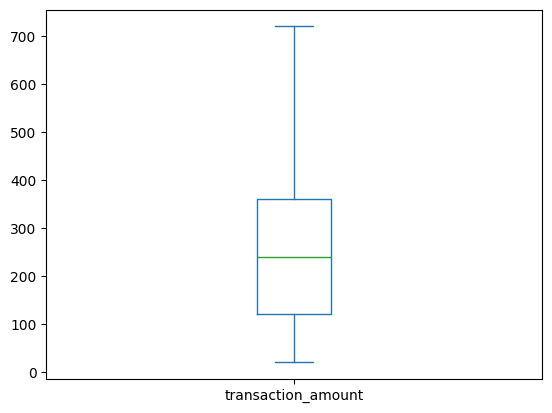

In [34]:
yas_dolu_veri_seti.plot.box()

In [35]:
other_NoN

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Other,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,Other,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,Other,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,Other,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,Other,Mrs.,Afternoon


In [37]:
t1  = other_NoN.groupby(['time_of_sale','item_name']).sum().loc[:,['transaction_amount','item_price','quantity']]
t1

transaction_amount  item_price  quantity
time_of_sale item_name                                                
Afternoon    Aalopuri                       4520         580       226
             Cold coffee                   13480        1360       337
             Frankie                       11900        1550       238
             Panipuri                       4600         560       230
             Sandwich                       9840        1140       164
             Sugarcane juice                8125        1025       325
             Vadapav                        3880         460       194
Evening      Aalopuri                       2720         380       136
             Cold coffee                    9400        1200       235
             Frankie                       12000        1450       240
             Panipuri                       4820         720       241
             Sandwich                      12360        1740       206
             Sugarcane juice                7075         800       283
             Vadapav                        3980         520       199
Midnight     Aalopuri                       4460         660       223
             Cold coffee                    8120        1040       203
             Frankie                        9900        1100       198
             Panipuri                       5560         620       278
             Sandwich                      12060        1560       201
             Sugarcane juice                5925         700       237
             Vadapav                        4700         660       235
Morning      Aalopuri                       4300         540       215
             Cold coffee                   11480        1280       287
             Frankie                       10200        1150       204
             Panipuri                       4660         580       233
             Sandwich                      14040        1500       234
             Sugarcane juice                5150         625       206
             Vadapav                        3900         580       195
Night        Aalopuri                       4880         520       244
             Cold coffee                   11960        1560       299
             Frankie                       13500        1700       270
             Panipuri                       4880         520       244
             Sandwich                      17520        1800       292
             Sugarcane juice                5675         675       227
             Vadapav                        3660         460       183

In [62]:
other_NoN['zamli_sutun'] = other_NoN['item_price']+5  # Başka bir sütunun değerinin iki katı atanır

In [63]:
other_NoN['zamli_trans'] = other_NoN['zamli_sutun'] * other_NoN['quantity']  # Başka bir sütunun değerinin iki katı atanır

In [64]:
other_NoN

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,zamli_sutun,zamli_trans
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Other,Mr.,Night,25,325
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,25,375
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,25,25
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,30,180
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,30,240
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,Other,Mrs.,Evening,55,550
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,Other,Mr.,Evening,65,455
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,Other,Mr.,Evening,65,845
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,Other,Mrs.,Afternoon,25,125


In [65]:
t2  = other_NoN.groupby(['item_name']).sum().loc[:,['transaction_amount','quantity','zamli_trans']]
t2

,transaction_amount,quantity,zamli_trans
item_name,,,
Aalopuri,20880,1044,26100
Cold coffee,54440,1361,61245
Frankie,57500,1150,63250
Panipuri,24520,1226,30650
Sandwich,65820,1097,71305
Sugarcane juice,31950,1278,38340
Vadapav,20120,1006,25150


In [66]:
t2['kar_orani'] = (t2['zamli_trans'] - t2['transaction_amount']) / t2['transaction_amount'] * 100
t2

,transaction_amount,quantity,zamli_trans,kar_orani
item_name,,,,
Aalopuri,20880,1044,26100,25.000000
Cold coffee,54440,1361,61245,12.500000
Frankie,57500,1150,63250,10.000000
Panipuri,24520,1226,30650,25.000000
Sandwich,65820,1097,71305,8.333333
Sugarcane juice,31950,1278,38340,20.000000
Vadapav,20120,1006,25150,25.000000


In [67]:
t2.loc['Toplam'] = t2.sum()
t2

,transaction_amount,quantity,zamli_trans,kar_orani
item_name,,,,
Aalopuri,20880.0,1044.0,26100.0,25.000000
Cold coffee,54440.0,1361.0,61245.0,12.500000
Frankie,57500.0,1150.0,63250.0,10.000000
Panipuri,24520.0,1226.0,30650.0,25.000000
Sandwich,65820.0,1097.0,71305.0,8.333333
Sugarcane juice,31950.0,1278.0,38340.0,20.000000
Vadapav,20120.0,1006.0,25150.0,25.000000
Toplam,275230.0,8162.0,316040.0,125.833333


In [68]:
t2.drop('Toplam', inplace=True)
t2.drop('kar_orani', axis=1, inplace=True)
t2

,transaction_amount,quantity,zamli_trans
item_name,,,
Aalopuri,20880.0,1044.0,26100.0
Cold coffee,54440.0,1361.0,61245.0
Frankie,57500.0,1150.0,63250.0
Panipuri,24520.0,1226.0,30650.0
Sandwich,65820.0,1097.0,71305.0
Sugarcane juice,31950.0,1278.0,38340.0
Vadapav,20120.0,1006.0,25150.0


In [69]:
t2.loc['Toplam'] = t2.sum()
t2

,transaction_amount,quantity,zamli_trans
item_name,,,
Aalopuri,20880.0,1044.0,26100.0
Cold coffee,54440.0,1361.0,61245.0
Frankie,57500.0,1150.0,63250.0
Panipuri,24520.0,1226.0,30650.0
Sandwich,65820.0,1097.0,71305.0
Sugarcane juice,31950.0,1278.0,38340.0
Vadapav,20120.0,1006.0,25150.0
Toplam,275230.0,8162.0,316040.0


In [70]:
t2['kar_orani'] = (t2['zamli_trans'] - t2['transaction_amount']) / t2['transaction_amount'] * 100
t2

,transaction_amount,quantity,zamli_trans,kar_orani
item_name,,,,
Aalopuri,20880.0,1044.0,26100.0,25.000000
Cold coffee,54440.0,1361.0,61245.0,12.500000
Frankie,57500.0,1150.0,63250.0,10.000000
Panipuri,24520.0,1226.0,30650.0,25.000000
Sandwich,65820.0,1097.0,71305.0,8.333333
Sugarcane juice,31950.0,1278.0,38340.0,20.000000
Vadapav,20120.0,1006.0,25150.0,25.000000
Toplam,275230.0,8162.0,316040.0,14.827599


In [114]:
from scipy.spatial import distance
toplam_transaction_v = t2.loc['Toplam', 'transaction_amount']
toplam_zamli_v = t2.loc['Toplam', 'zamli_trans']

print(toplam_transaction_v )
print(toplam_zamli_v)
vector1=[toplam_transaction_v]
vector2=[toplam_zamli_v]
mv12 = distance.cityblock(vector1, vector2)   #mutlak farklarını alıp toplar

print ("vektör1 ve vektör2 arasındaki uzaklık={} şeklindedir".format(mv12))

uzaklık_1_2 = distance.cosine(vector1, vector2) 

print ("vektör1 ve vektör2 arasındaki benzerlik={} şeklindedir".format(1-uzaklık_1_2))

275230.0
316040.0
vektör1 ve vektör2 arasındaki uzaklık=40810.0 şeklindedir
vektör1 ve vektör2 arasındaki benzerlik=1 şeklindedir


<Axes: >

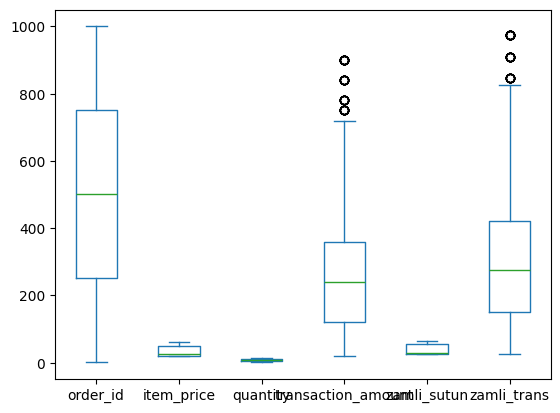

In [116]:
other_NoN.plot.box() 

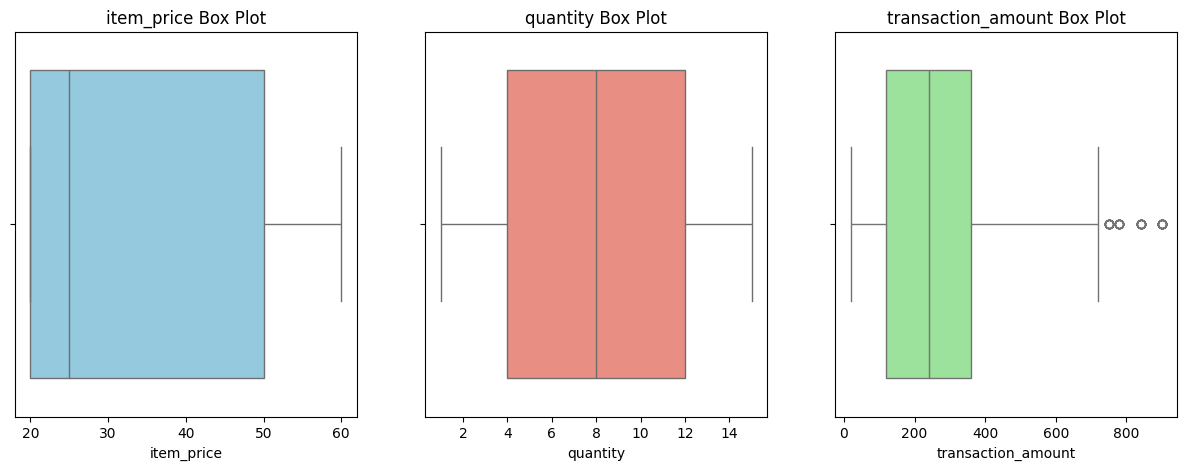

In [118]:
import seaborn as sns

# Kutu Grafik
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=other_NoN['item_price'], ax=axs[0], color='skyblue')
axs[0].set_title('item_price Box Plot')

sns.boxplot(x=other_NoN['quantity'], ax=axs[1], color='salmon')
axs[1].set_title('quantity Box Plot')

sns.boxplot(x=other_NoN['transaction_amount'], ax=axs[2], color='lightgreen')
axs[2].set_title('transaction_amount Box Plot')

plt.show()


In [122]:
# Örnek
toplam_sutun = other_NoN['transaction_amount'].sum(axis=0)
ort_sutun = other_NoN['transaction_amount'].mean(axis=0)
medyan_sutun = other_NoN['transaction_amount'].median(axis=0)
print(toplam_sutun)
print(ort_sutun)
print(medyan_sutun)

275230
275.23
240.0


In [123]:
other_NoN.describe()

,order_id,item_price,quantity,transaction_amount,zamli_sutun,zamli_trans
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000,38.315000,316.040000
std,288.819436,14.921744,4.413075,204.402979,14.921744,221.062632
min,1.000000,20.000000,1.000000,20.000000,25.000000,25.000000
25%,250.750000,20.000000,4.000000,120.000000,25.000000,150.000000
50%,500.500000,25.000000,8.000000,240.000000,30.000000,275.000000
75%,750.250000,50.000000,12.000000,360.000000,55.000000,420.000000
max,1000.000000,60.000000,15.000000,900.000000,65.000000,975.000000
